Department of Physics, University of Pisa AA 2019-2020)

### Multimessenger Physics Laboratory tutorial series



## Exercise 1 - Reading and manipulating CSV files
#### (M. Razzano, Mar 11, 2020)

In this exercise you will have to read and manipulate a file coming from the Exoplanet catalog

### Basic Setup
In the cell below you should import the modules that you think you will require...

In [1]:
import os
import sys

import numpy as np

### Open and explore  data file

The file, named catalog_exoplanets_nasa.csv, is already in the data directory. Define a work, data and results directories, and open the file
Open it and look how many lines are and if there are headers etc...
How many columns are there? 

In [2]:
code_dir=os.getcwd() #defines code directory (the one in which we are)
main_dir=os.path.dirname(code_dir) #defines main directory
data_dir=os.path.join(main_dir,"data") #defines data directory
results_dir=os.path.join(main_dir,"results") #defines results directory (which does not exist)
if not os.path.exists(results_dir): #creates the results directory if it does not exist
    os.mkdir(results_dir)

catalog_exoplanets_nasa_filename="catalog_exoplanets_nasa.csv"
catalog_exoplanets_nasa_file=open(os.path.join(data_dir,catalog_exoplanets_nasa_filename),"r")

#the readlines function gives a list with a line each
catalog_exoplanets_nasa_lines=catalog_exoplanets_nasa_file.readlines()

#makes the first 145 lines better looking in order to work better with them
catalog_lines=[]
for li in range(len(catalog_exoplanets_nasa_lines)):
    line=catalog_exoplanets_nasa_lines[li]
    if(line[0:9]=="# COLUMN "):
        catalog_lines.append(line.replace("# COLUMN ",""))
    else: 
        if(line[0]!="#"):
            catalog_lines.append(line)
        
#LEGEND: prints first 145 lines (the ones that tell what the column names mean) 
legend=[]
for li in range(142):
    legend.append(catalog_lines[li])
    print(li,legend[li])

#DATAS:
datas=[]
for li in range(142,len(catalog_lines)):
    datas.append(catalog_lines[li])
    #print(li,datas[li-142])
    
#HEADER and COLUMN NAMES
header=datas[0]
column_names = header.split(",")
print(column_names)


#create and init a dictionary of lists..
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]

#we start from 1 since we want to skip the first line containing the headers.
for ri in range(1,len(datas)):
    data_line = datas[ri].split(",")
    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])
        
#print(data_dict["pl_orbsmax"])

0 pl_hostname:    Host Name

1 pl_letter:      Planet Letter

2 pl_name:        Planet Name

3 pl_discmethod:  Discovery Method

4 pl_pnum:        Number of Planets in System

5 pl_orbper:      Orbital Period [days]

6 pl_orbsmax:     Orbit Semi-Major Axis [AU])

7 pl_orbeccen:    Eccentricity

8 pl_orbincl:     Inclination [deg]

9 pl_bmassj:      Planet Mass or M*sin(i) [Jupiter mass]

10 pl_bmassprov:   Planet Mass or M*sin(i) Provenance

11 pl_radj:        Planet Radius [Jupiter radii]

12 pl_dens:        Planet Density [g/cm**3]

13 pl_ttvflag:     TTV Flag

14 pl_kepflag:     Kepler Field Flag

15 pl_k2flag:      K2 Mission Flag

16 pl_nnotes:      Number of Notes

17 ra_str:         RA [sexagesimal]

18 ra:             RA [decimal degrees]

19 dec_str:        Dec [sexagesimal]

20 dec:            Dec [decimal degrees]

21 st_dist:        Distance [pc]

22 st_optmag:      Optical Magnitude [mag]

23 st_optband:     Optical Magnitude Band

24 gaia_gmag:      G-band (Gaia) [mag]

2

### Save in a list of arrays

Read the data file and for each column create a numpy array. 
Some quantities are not expressed in SI Units. Can you convert them, e.g. from AU to m, or from years to seconds?

Text(0, 0.5, 'Number of systems with x planets')

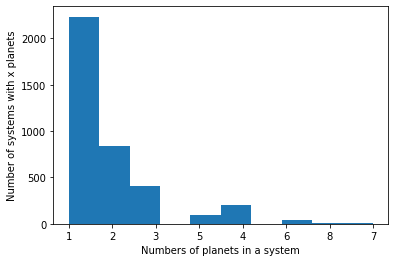

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.axes as ax

#converts lists to numpy arrays...
data_dict["Distance"]=np.asarray(data_dict["st_dist"])
data_dict["Optical Magnitude"]=np.asarray(data_dict["st_optmag"])
data_dict["numbers of planets in system"]=np.asarray(data_dict["pl_pnum"])
plt.hist(data_dict["numbers of planets in system"])
plt.xlabel("Numbers of planets in a system")
plt.ylabel("Number of systems with x planets")

### Do some plotting

Choose few quantities and make a scatter plot and an histogram.

TypeError: locator_params() missing 1 required positional argument: 'self'

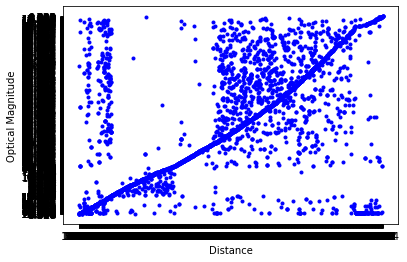

In [25]:
#plt.hist(data_dict["numbers of planets in system"],bins=data_dict["stellar mass"])
plt.scatter(data_dict["Distance"],data_dict["Optical Magnitude"],marker=".",color="blue")
plt.ylabel("Optical Magnitude")
plt.xlabel("Distance")
#plt.grid()
#yaxis.set_ticks(np.arange(70000,80000,2500))
#ax.Axes.locator_params(axis='both', tight=True)
#plt.show()

### Save in an output file

Are you able to save the data in a more readable file? I.e., a file with no comments and just the headers, and the data in SI format?

In [31]:
out_filename = os.path.join(results_dir,"output.txt")

#we use the open command
out_file = open(out_filename,"w")  #writing mode

for li in range(142): 
    out_line = str(li)+"  "+legend[li]+"\n"   #just print a legend
    out_file.write(out_line)
    
for li in range(142,len(catalog_lines)):
    out_line = str(li)+"  "+datas[li-142]+"\n"   #just print a legend
    out_file.write(out_line)
    
out_file.close() 

### Final steps
Congratulations! Don't forget to save to Github (using Google colabs or git commit + git push)